In [ ]:
list=["SOLO", "hello", "Tea", "wHat"]


In [ ]:
def check(list):
    count=0
    for i in list:
        for j in i:
            if j.isupper()==True:
                count+=1
    return count            
check(["little", "lower", "down"])

In [ ]:
dict={ "a": 1, "b": 2, "c": 3}
for i,j in dict.items():
    x=j
    j=i
    i=x
    print(i,":",j)

In [ ]:
# Run the code cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

In [76]:
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
df.drop(columns="Unnamed: 16",inplace=True)

In [ ]:
df.isnull().sum()
df=df.dropna()

In [85]:
# Get the Pandas series containing the year values as integers.
year_series = df.DateTime.dt.year

# Get the Pandas series containing the month values as integers.
month_series = df.DateTime.dt.month

# Get the Pandas series containing the day values as integers.
day_series = df.DateTime.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = df.DateTime.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day_Name'] = day_name_series

In [91]:
df = df.sort_values(by='DateTime')
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name,Day_Name
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,Wednesday,Wednesday
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,Wednesday,Wednesday
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,Wednesday,Wednesday
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,Wednesday,Wednesday
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,Wednesday,Wednesday


In [97]:
# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = [ 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]
df

KeyError: ignored

In [100]:
aq_2004_df 
# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

In [101]:

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

In [103]:
# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')
# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int64         
 11  Month          9357 non-null   int64         
 12  Day            9357 non-null   int64         
 13  Day Name       9357 non-null   object        
 14  Day_Name       9357 non-null   object        
dtypes: datetime64[ns](1),

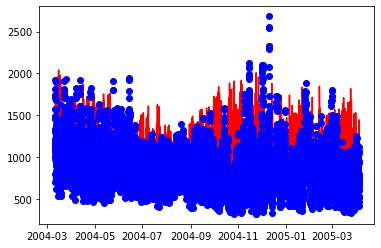

In [125]:
plt.plot(df.DateTime,df["PT08.S1(CO)"],"-r",label="CO"	)
plt.plot(df.DateTime,df["PT08.S3(NOx)"],"ob",label="O3")

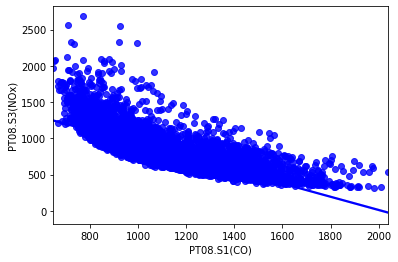

In [124]:
sns.regplot(df["PT08.S1(CO)"],df["PT08.S3(NOx)"],color="blue")

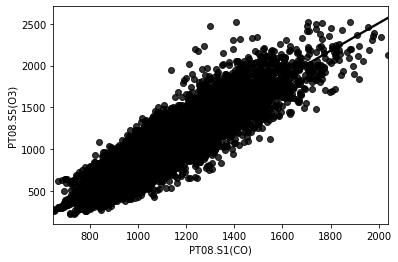

In [121]:
#plt.scatter(df["PT08.S1(CO)"],df["PT08.S5(O3)"])
sns.regplot(df["PT08.S1(CO)"],df["PT08.S5(O3)"],color="black")

ozone and carbon monooxide has positive correlation. In medical science ozone therapy is used to treat person exposed to carbon monooxide as it reacts and give carbondioxide and oxygen.

In [127]:
correlation=np.corrcoef(df["PT08.S1(CO)"],df["PT08.S3(NOx)"])
correlation

array([[ 1.        , -0.76992041],
       [-0.76992041,  1.        ]])

CO and NOx has negative correlation

In [130]:
corr=df.corr()
corr

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
PT08.S1(CO),1.000000,0.882921,0.892097,-0.769920,0.677392,0.899369,0.048765,0.114426,0.134961,0.024821,-0.039798,-0.019430
C6H6(GT),0.882921,1.000000,0.981707,-0.730267,0.764243,0.864326,0.203647,-0.062666,0.172959,-0.140098,0.132409,-0.007452
PT08.S2(NMHC),0.892097,0.981707,1.000000,-0.792370,0.775995,0.879285,0.245397,-0.091310,0.191374,-0.153476,0.132807,-0.015351
PT08.S3(NOx),-0.769920,-0.730267,-0.792370,1.000000,-0.528111,-0.795013,-0.138125,-0.057582,-0.224756,-0.151616,-0.052803,0.029211
PT08.S4(NO2),0.677392,0.764243,0.775995,-0.528111,1.000000,0.585281,0.568770,-0.034751,0.635471,-0.510821,0.194285,-0.025612
PT08.S5(O3),0.899369,0.864326,0.879285,-0.795013,0.585281,1.000000,-0.027593,0.124988,0.069730,0.045971,0.045307,-0.032672
T,0.048765,0.203647,0.245397,-0.138125,0.568770,-0.027593,1.000000,-0.576271,0.661982,-0.532344,0.297623,-0.018230
RH,0.114426,-0.062666,-0.091310,-0.057582,-0.034751,0.124988,-0.576271,1.000000,0.163933,0.104650,0.075999,-0.021295
AH,0.134961,0.172959,0.191374,-0.224756,0.635471,0.069730,0.661982,0.163933,1.000000,-0.521380,0.433595,-0.057158
Year,0.024821,-0.140098,-0.153476,-0.151616,-0.510821,0.045971,-0.532344,0.104650,-0.521380,1.000000,-0.692156,-0.054517


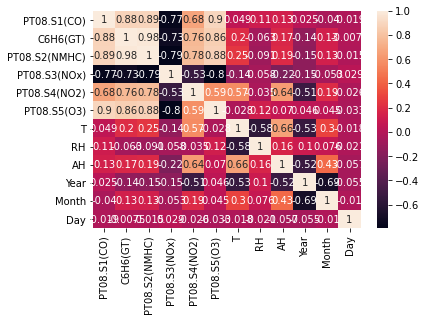

In [131]:
sns.heatmap(corr,annot=True)

In [133]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

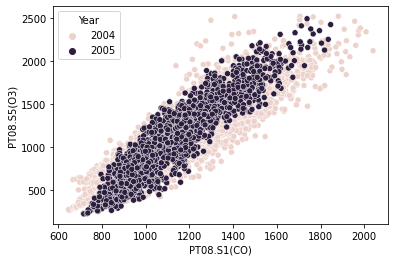

In [139]:
sns.scatterplot(df["PT08.S1(CO)"],df["PT08.S5(O3)"],hue=df.Year)

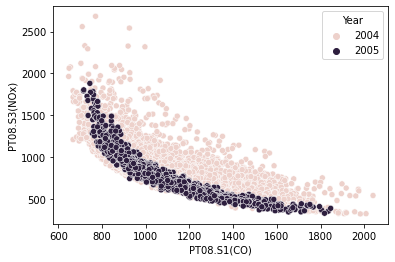

In [138]:
sns.scatterplot(df["PT08.S1(CO)"],df["PT08.S3(NOx)"],hue=df.Year)

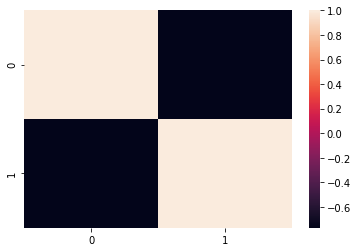

In [129]:
sns.heatmap(correlation)